# Mandatory assignment 1



<b> Research question </b>

<i>  How is attendance affected by various factors? </i>
* Does the instructor affect student attendance?
* Does difficulty affect student attendance?
* Does number of repitions of course affect attendance?


Research attendance, does 4 indicate low or high attendance?

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
#import pandas_profiling

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def create_folder(name):
    try:
        os.mkdir(name)
    except FileExistsError as FEE:
        print(FEE)
        

In [32]:
create_folder("images")

[Errno 17] File exists: 'images'


In [65]:
df = pd.read_csv('data-sets/data.csv')

In [66]:
df.head(5)
#save_fig("klaus")

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [67]:
df.count()

instr         5820
class         5820
nb.repeat     5820
attendance    5820
difficulty    5820
Q1            5820
Q2            5820
Q3            5820
Q4            5820
Q5            5820
Q6            5820
Q7            5820
Q8            5820
Q9            5820
Q10           5820
Q11           5820
Q12           5820
Q13           5820
Q14           5820
Q15           5820
Q16           5820
Q17           5820
Q18           5820
Q19           5820
Q20           5820
Q21           5820
Q22           5820
Q23           5820
Q24           5820
Q25           5820
Q26           5820
Q27           5820
Q28           5820
dtype: int64

As the dataset dosent claim if attendance is high and the course is difficult based on the answer (0-5), we choose to establish a hypothesis to determine what the number means.

If a student has a high attendance for a course, then we must assume that the majotiy of students must think that the course was easy. Therefore, as the plot shows below, the number of student with high attendance also answered the lowest number as how diffuclt the course had been.

In [68]:
corr_matrix = df.corr()
corr_matrix["attendance"].sort_values(ascending=False)

attendance    1.000000
difficulty    0.436792
Q17           0.231480
Q22           0.207740
Q21           0.204802
Q25           0.204435
Q14           0.202252
Q28           0.200150
Q15           0.195845
Q20           0.195166
Q19           0.190694
Q13           0.186478
Q9            0.182293
Q18           0.179173
Q11           0.178899
Q3            0.178393
Q23           0.177814
Q26           0.172695
Q24           0.163546
Q16           0.153071
Q5            0.149747
Q2            0.149258
Q10           0.146931
Q27           0.144687
Q6            0.143705
Q4            0.138108
Q7            0.137472
Q8            0.132821
Q12           0.129572
Q1            0.105266
class        -0.016312
nb.repeat    -0.078086
instr        -0.107231
Name: attendance, dtype: float64

In [69]:
df_corr = df[['attendance', 'difficulty']]
df_corr.corr()

,attendance,difficulty
attendance,1.000000,0.436792
difficulty,0.436792,1.000000


Saving figure count_difficulty_with_attendance


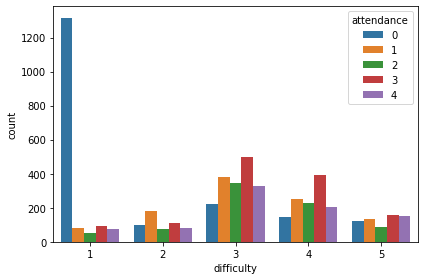

In [70]:
sn.countplot(data=df, x="difficulty", hue='attendance')
save_fig("count_difficulty_with_attendance")
plt.show()

Saving figure count_q9_with_attendance


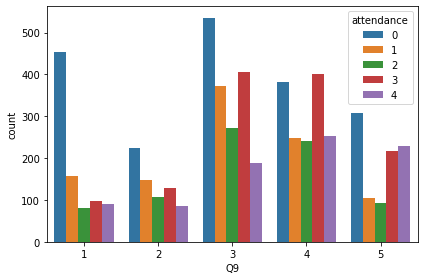

In [71]:
# Q9: difficulty - Level of difficulty of the course as perceived by the student; values taken from 1,2,3,4,5
sn.countplot(data=df, x="Q9", hue='attendance')
save_fig("count_q9_with_attendance")
plt.show()

Saving figure count_q14_with_attendance


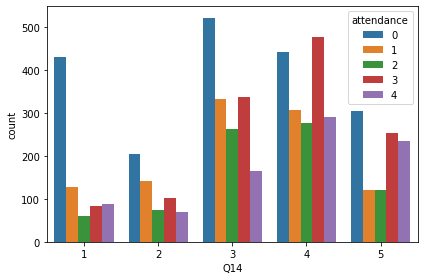

In [72]:
# Q14: The Instructor came prepared for classes.
sn.countplot(data=df, x="Q14", hue='attendance')
save_fig("count_q14_with_attendance")
plt.show()

Saving figure count_q17_with_attendance


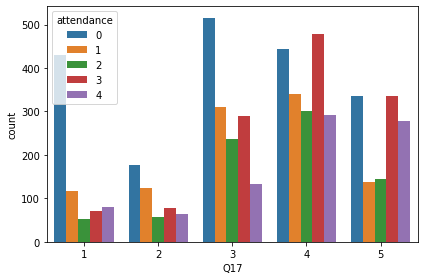

In [73]:
# Q17: The Instructor arrived on time for classes.
sn.countplot(data=df, x="Q17", hue='attendance')
save_fig("count_q17_with_attendance")
plt.show()

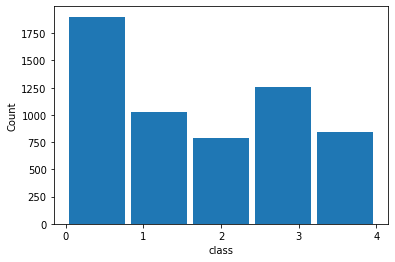

In [74]:
plt.hist(df['attendance'], bins=5, histtype='bar', rwidth=0.9)
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4])
plt.show()

In [75]:
# What is the attendance score of the
# student for each of the instructors?
df_instr_three = df[df.instr == 3]
instructor_data = df_instr_three['attendance'].value_counts(normalize=True).sort_index() * 100
instructor_data

0    37.211886
1    16.245487
2    13.163010
3    19.938906
4    13.440711
Name: attendance, dtype: float64

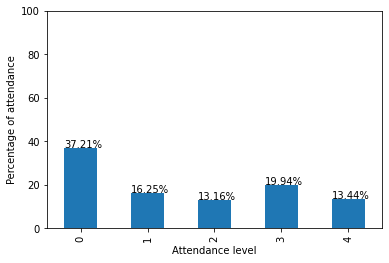

In [76]:
mydata = instructor_data.plot.bar()
mydata.set_ylim((0,100))
mydata.set_xlabel("Attendance level")
mydata.set_ylabel("Percentage of attendance")

for p in mydata.patches:
    mydata.annotate(str(round(p.get_height(),2))+"%", (p.get_x(), p.get_height()))

plt.show()

In [87]:
df_instr_att = df[['instr', 'attendance']]

In [88]:
df_instr_att = pd.concat([df_instr_att,pd.get_dummies(df_instr_att['attendance'], prefix='attendance')],axis=1)

df_instr_att.drop(['attendance'],axis=1, inplace=True)

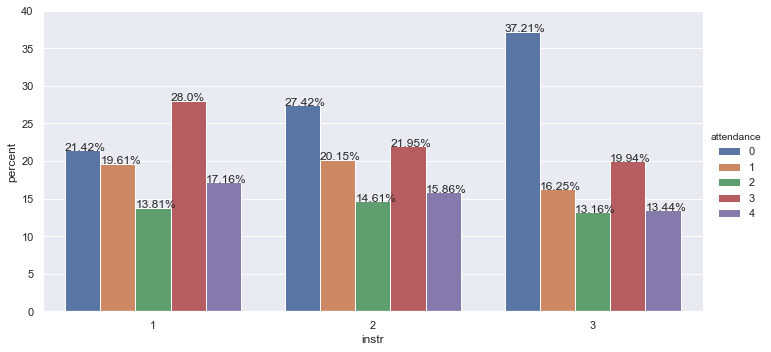

In [117]:
sn.set(color_codes=True)

x,y = 'instr', 'attendance'

df_instr_att = df.groupby(x)[y].value_counts(normalize=True)
df_instr_att = df_instr_att.mul(100)
df_instr_att = df_instr_att.rename('percent').reset_index()

g = sn.catplot(x=x,y='percent',hue=y,kind='bar',data=df_instr_att,height=5, aspect=2)
g.ax.set_ylim(0,40)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)